# Hypothesis Tests

## 1. Description of Hypothesis Tests

In this section, we will perform hypothesis tests to investigate the relationships between PM2.5 levels and the prevalence of diabetes and hypertension across different counties in the United States. 

**H0**: There is no association between long-term exposure to fine particulate matter (PM2.5) and the prevalence of diabetes and hypertension in counties.

**H1**: Counties with higher long-term exposure to fine particulate matter (PM2.5) have higher prevalence of diabetes and hypertension.

To test our hypothesis we will create two sub hypotheses and tests for diabetes and hypertension separately:

Test 1: Association between PM2.5 levels and prevalence of diabetes

- H0: There is no significant association between PM2.5 levels and the prevalence of diabetes in counties.

- H1: There is a significant association between PM2.5 levels and the prevalence of diabetes in counties.

Test 2: Association between PM2.5 levels and prevalence of hypertension

- H0: There is no significant association between PM2.5 levels and the prevalence of hypertension in counties.

- H1: There is a significant association between PM2.5 levels and the prevalence of hypertension in counties.

We will use pearson correlation coefficient to measure the strength and direction of the linear relationship between PM2.5 levels and the prevalence of diabetes and hypertension. Also spearman correlation coefficient will be used to assess the monotonic relationship. At the end, we will interpret the results of the two tests to determine whether to reject or fail to reject our main hypothesis. If we find significant associations in both tests, we will reject the null hypothesis and conclude that higher PM2.5 levels are associated with higher prevalence of diabetes and hypertension and we will continue with modeling to test further by normalizing with control variables. If we fail to find significant associations, we will fail to reject the null hypothesis.

##

## 2. Loading and Visualizing Data

We load the merged dataset containing PM2.5 levels and health outcome measures (diabetes and hypertension prevalence) for each county. We will visualize the data using scatter plots to observe the relationships between PM2.5 levels and the prevalence of diabetes and hypertension separately to identify any apparent trends or patterns before conducting formal hypothesis tests.

In [1]:
import pandas as pd
from utils import build_dataset

df = build_dataset()
print(df.shape)
df.head()

(2031, 15)


,state_name,county_name,diabetes,hypertension,avg_pm25,smoking,obesity,no_lt_physical_activity,binge_drinking,lack_of_health_insurance,routine_checkup,food_insecurity,housing_insecurity,urbanization_level,total_population
0,Alabama,Autauga,12.801106,39.766772,9.368209,15.732203,38.518095,27.021571,15.653033,9.485857,78.792370,14.168051,12.590560,3.0,52330.0
1,Alabama,Baldwin,13.562457,38.971898,9.032785,15.251463,37.481267,26.099429,15.721423,9.543464,79.588085,12.430609,10.867041,4.0,220883.0
2,Alabama,Barbour,19.228656,48.830900,9.384510,22.378557,44.051119,36.492743,12.373823,16.273083,80.722836,28.030746,22.300066,5.0,18230.0
3,Alabama,Bibb,14.097975,41.093925,8.611423,22.432185,42.773783,32.354352,16.336234,13.583197,76.351012,20.779147,17.391900,2.0,7457.0
4,Alabama,Blount,13.682667,40.040971,8.895551,18.004993,37.280192,29.939611,15.544167,12.557489,78.048988,15.312283,12.549099,2.0,46985.0


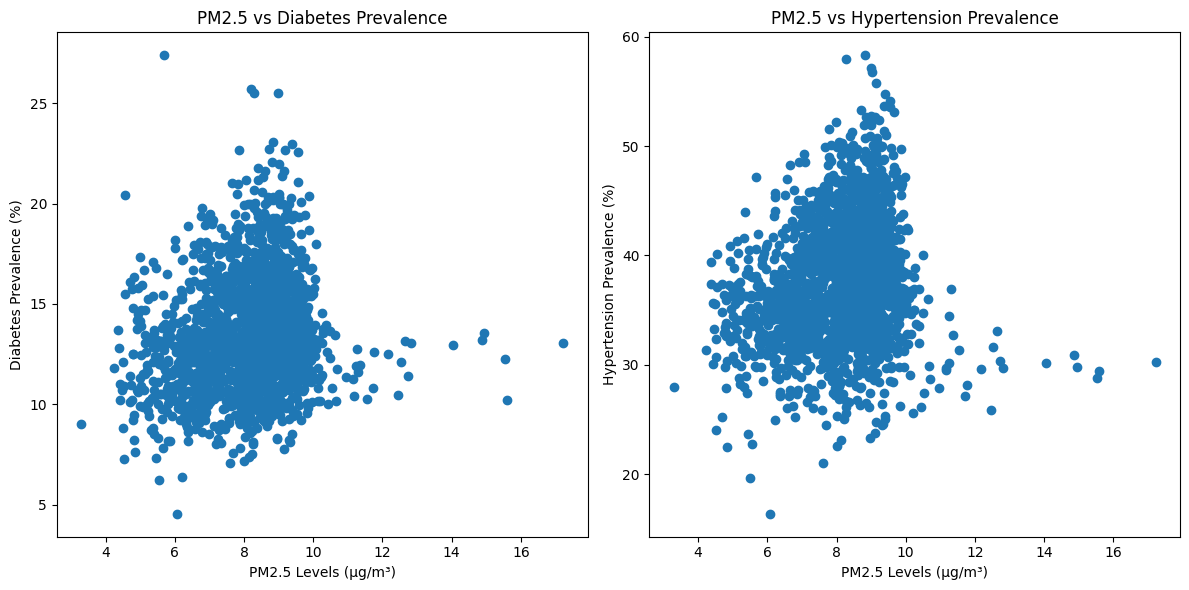

In [2]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(df["avg_pm25"], df["diabetes"])
ax[0].set_title("PM2.5 vs Diabetes Prevalence")
ax[0].set_xlabel("PM2.5 Levels (µg/m³)")
ax[0].set_ylabel("Diabetes Prevalence (%)")
ax[1].scatter(df["avg_pm25"], df["hypertension"])
ax[1].set_title("PM2.5 vs Hypertension Prevalence")
ax[1].set_xlabel("PM2.5 Levels (µg/m³)")
ax[1].set_ylabel("Hypertension Prevalence (%)")
plt.tight_layout()
plt.show()

## 3. Pearson Correlation Tests

Calculate the Pearson correlation coefficients and p-values for the relationships between PM2.5 levels and the prevalence of diabetes and hypertension.

In [3]:
from scipy import stats

# Pearson correlation for PM2.5 and Diabetes
corr_diabetes, p_value_diabetes = stats.pearsonr(df["avg_pm25"], df["diabetes"])
print(f"(PM2.5 vs Diabetes) Pearson correlation coefficient: {corr_diabetes:.4f}, p-value: {p_value_diabetes}")

# Pearson correlation for PM2.5 and Hypertension
corr_hypertension, p_value_hypertension = stats.pearsonr(df["avg_pm25"], df["hypertension"])
print(f"(PM2.5 vs Hypertension) Pearson correlation coefficient: {corr_hypertension:.4f}, p-value: {p_value_hypertension}")


(PM2.5 vs Diabetes) Pearson correlation coefficient: 0.1767, p-value: 1.0384510325945988e-15
(PM2.5 vs Hypertension) Pearson correlation coefficient: 0.1821, p-value: 1.3100372547792744e-16


## 4. Spearman Correlation Tests

Calculate the Spearman correlation coefficients and p-values for the relationships between PM2.5 levels and the prevalence of diabetes and hypertension.

In [4]:
# Spearman correlation for PM2.5 and Diabetes
spearman_corr_diabetes, spearman_p_value_diabetes = stats.spearmanr(df["avg_pm25"], df["diabetes"])
print(f"(PM2.5 vs Diabetes) Spearman correlation coefficient: {spearman_corr_diabetes:.4f}, p-value: {spearman_p_value_diabetes}")
# Spearman correlation for PM2.5 and Hypertension
spearman_corr_hypertension, spearman_p_value_hypertension = stats.spearmanr(df["avg_pm25"], df["hypertension"])
print(f"(PM2.5 vs Hypertension) Spearman correlation coefficient: {spearman_corr_hypertension:.4f}, p-value: {spearman_p_value_hypertension}")

(PM2.5 vs Diabetes) Spearman correlation coefficient: 0.1924, p-value: 2.1611841963362914e-18
(PM2.5 vs Hypertension) Spearman correlation coefficient: 0.2075, p-value: 3.488181905741117e-21


## 5. Interpretation of Results

Using a significance level of α = 0.05, the Pearson correlation analysis showed a weak but statistically significant positive association between PM2.5 exposure and both diabetes and hypertension prevalence. PM2.5 correlated with diabetes at r = 0.1767 (p = 1.038e-15) and with hypertension at r = 0.1821 (p = 1.31e-16), indicating that counties with higher pollution levels tend to exhibit slightly higher rates of these diseases. Because both p-values are below 0.05, the Pearson correlation test leads us to reject the null hypothesis and conclude that PM2.5 is significantly associated with both outcomes in a linear sense.

Spearman correlation, which evaluates monotonic relationships without assuming linearity, confirmed a significant association for diabetes (ρ = 0.1924, p = 2.161e-18) and for hypertension (ρ = 0.2075, p = 3.488e-21). This suggests that the pollution–diabetes and pollution–hypertension relationships are robust across correlation methods.

Overall, the Pearson results justify rejecting the null hypothesis and accepting that PM2.5 is positively associated with the two chronic disease outcomes tested, though the strength of these associations differ across methods. To further assess these relationships and explore predictive power, additional analyses using statistical modeling will be conducted in the next stage of the project by taking control variables into account.